# Chapter 10 - Exercise Solutions - Applied

In [2]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
     (LinearRegression,
      LogisticRegression,
      Lasso)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import \
     (train_test_split,
      GridSearchCV)

## 6

Consider the simple function $ R(\beta) = sin(\beta) + \beta/10 $.

**(a)** Draw a graph of this function over the range $ \beta \in [−6, 6] $.


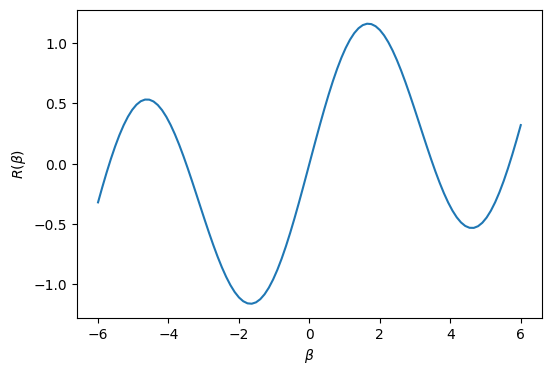

In [42]:
beta_series = np.linspace(-6, 6, 100)
R_series = np.sin(beta_series) + beta_series/10

fig, ax = subplots(1, 1, figsize=(6,4))
ax.plot(beta_series, R_series)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$R(\beta)$');

**(b)** What is the derivative of this function?

$$ \frac{\partial}{\partial \beta} R(\beta) = \frac{\partial}{\partial \beta} \left[ sin(\beta) + \beta/10 \right] $$

$$ \frac{\partial}{\partial \beta} R(\beta) = cos(\beta) + 1/10  $$

Plot of $R(\beta)$ and its derivative. We can see that when $R(\beta)$ slopes downward, its derivative is negative.

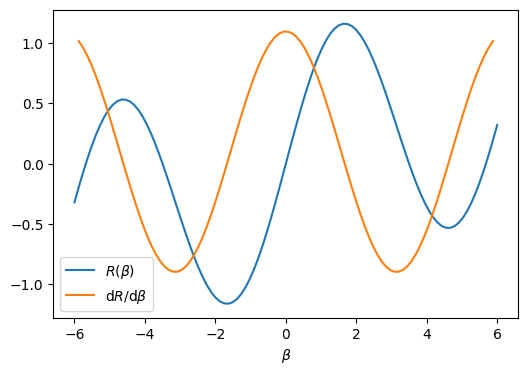

In [70]:
h = beta_series[1] - beta_series[0]
dR_dbeta = np.full_like(beta_series, np.nan)
dR_dbeta[1:-1] = (R_series[2:] - R_series[:-2]) / (2*h)

fig, ax = subplots(1, 1, figsize=(6,4))
ax.plot(beta_series, R_series, label=r'$R(\beta)$')
ax.plot(beta_series, dR_dbeta, label=r'd$R$/d$\beta$')
ax.set_xlabel(r'$\beta$')
ax.legend();

**(c)** Given $\beta_0 = 2.3$, run gradient descent to find a local minimum of $R(\beta)$ using a learning rate of $\rho = 0.1$. Show each of $\beta_0, \beta_1, ...$ in your plot, as well as the final answer.

Gradient descent involves updating the parameter $\beta$ by the gradient of $R(\beta)$ multiplied by a factor $\rho$.

$$ \beta^{m+1} \leftarrow \beta^{m} + \rho \nabla R(\beta^{m}) $$

In this case, $ \nabla R(\beta) $ is the simple partial derivative of $R$ with respect to $\beta$ evlauated at our intitial point $\beta_0$.

$$ \nabla R(\beta^{m}) = \frac{\partial}{\partial \beta} R(\beta) |_{\beta=\beta_0} $$

The initial position is $ \beta_0 = 2.3 $.

The first iteration is:

$ \frac{\partial}{\partial \beta} R(\beta) |_{\beta_0=2.3} = cos(\beta_0) + 1/10 = cos(2.3) + 1/10 = -0.66 + 1/10 = -0.56 $

$ \beta_{1} \leftarrow \beta_{0} - \rho \nabla R(\beta_{0}) $

$ \beta_{1} \leftarrow 2.3 - (0.1) (-0.56) $

$ \beta_{1} = 2.24 $

Test plot with the first two iterations:

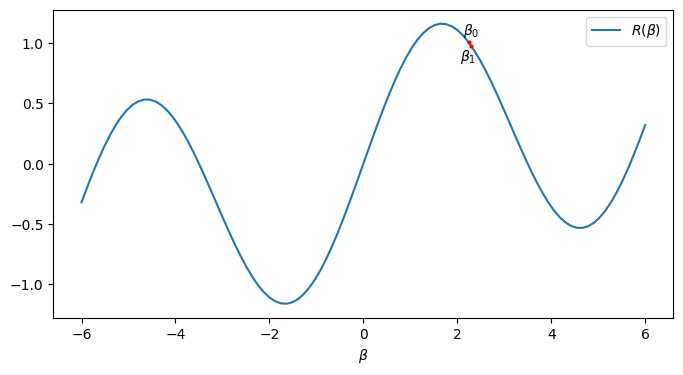

In [135]:
beta_0 = 2.3
R_0 = np.sin(beta_0) + beta_0/10

beta_1 = 2.24
R_1= np.sin(beta_1) + beta_1/10

fig, ax = subplots(1, 1, figsize=(8,4))
ax.plot(beta_series, R_series, label=r'$R(\beta)$')
ax.plot(beta_0, R_0, 'ro', markersize=2)
ax.text(beta_0, R_0 + 0.05, r'$\beta_0$', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax.plot(beta_1, R_1, 'ro', markersize=2)
ax.text(beta_1, R_1 - 0.05, r'$\beta_1$', fontsize=10, verticalalignment='top', horizontalalignment='center')
ax.set_xlabel(r'$\beta$')
ax.legend();

Plot of the full descent series

In [176]:
gradient = 10 # Start with an arbitrarily large value
beta_list = [2.3]
rho = 0.1
while abs(gradient) > 0.1:
    gradient = np.cos(beta_list[-1]) + 1/10
    beta_list.append(beta_list[-1] - rho * gradient)

len(beta_list)

42

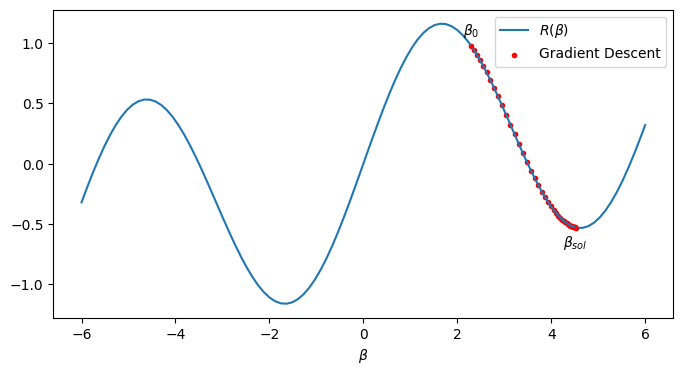

In [181]:
beta_array = np.array(beta_list)
R_array= np.sin(beta_array) + beta_array/10

fig, ax = subplots(1, 1, figsize=(8,4))
ax.plot(beta_series, R_series, label=r'$R(\beta)$')
ax.scatter(beta_array, R_array, color='r', marker='.', label='Gradient Descent')
ax.plot(beta_0, R_0, 'ro', markersize=2)
ax.text(beta_0, R_0 + 0.05, r'$\beta_0$', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax.plot(beta_array[-1], R_array[-1], 'ro', markersize=2)
ax.text(beta_array[-1], R_array[-1] - 0.05, r'$\beta_{sol}$', fontsize=10, verticalalignment='top', horizontalalignment='center')
ax.set_xlabel(r'$\beta$')
ax.legend();